# Retail Sales Exploratory Data Analysis

This project explores retail sales data to understand
sales trends, profitability, and regional performance.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [2]:
df = pd.read_csv(
    "/kaggle/input/superstore-dataset-final/Sample - Superstore.csv",
    encoding="latin1"
)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape
df.columns
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Dataset Overview
- The dataset contains retail sales transaction data.
- Columns include Sales, Profit, Category, Sub-Category, Region, and Order Date.
- The data will be analyzed to identify sales trends and profitability patterns.


In [4]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [5]:
df.drop_duplicates(inplace=True)
# remove duplicates

In [6]:
# feature engineering
df['Year']=df['Order Date'].dt.year
df['Month']=df['Order Date'].dt.month


**1st Visualization**:
Sales by Region

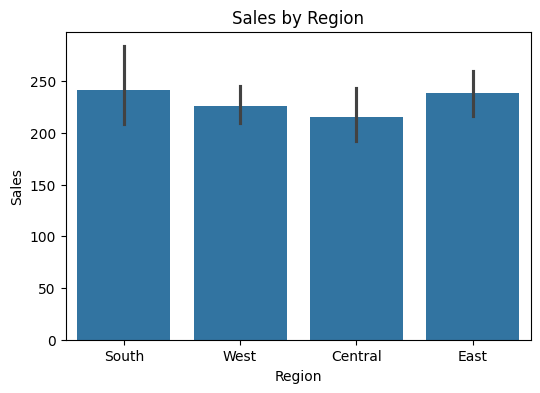

In [7]:
plt.figure(figsize=(6,4))
sns.barplot(x='Region',y='Sales',data=df)
plt.title("Sales by Region")
plt.show()

**Profit by category**

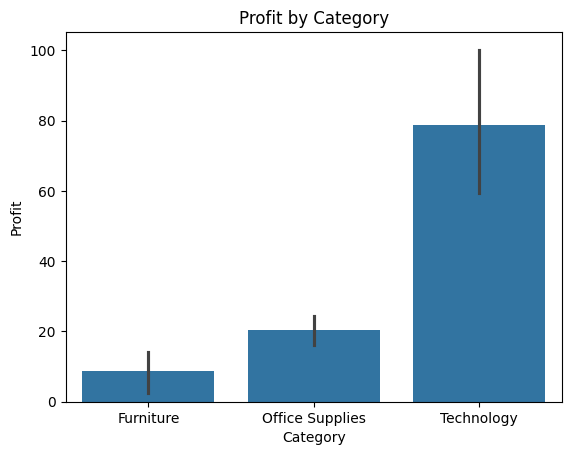

In [8]:
sns.barplot(x='Category',y='Profit',data=df)
plt.title("Profit by Category")
plt.show()

**Monthly sales trend**

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


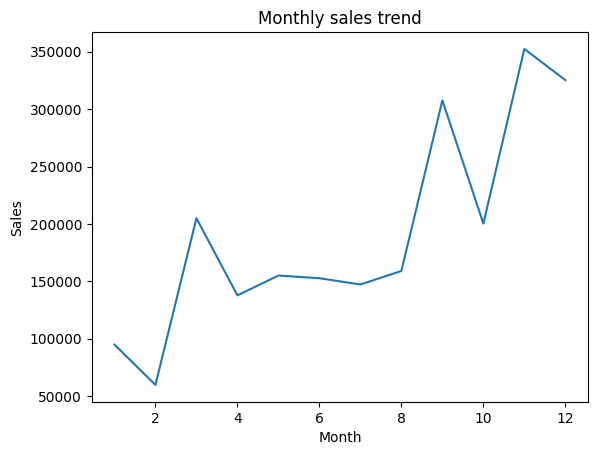

In [10]:
monthly_sales=df.groupby('Month')['Sales'].sum().reset_index()
sns.lineplot(x='Month',y='Sales',data=monthly_sales)
plt.title("Monthly sales trend")
plt.show()

**Top 10 Products**

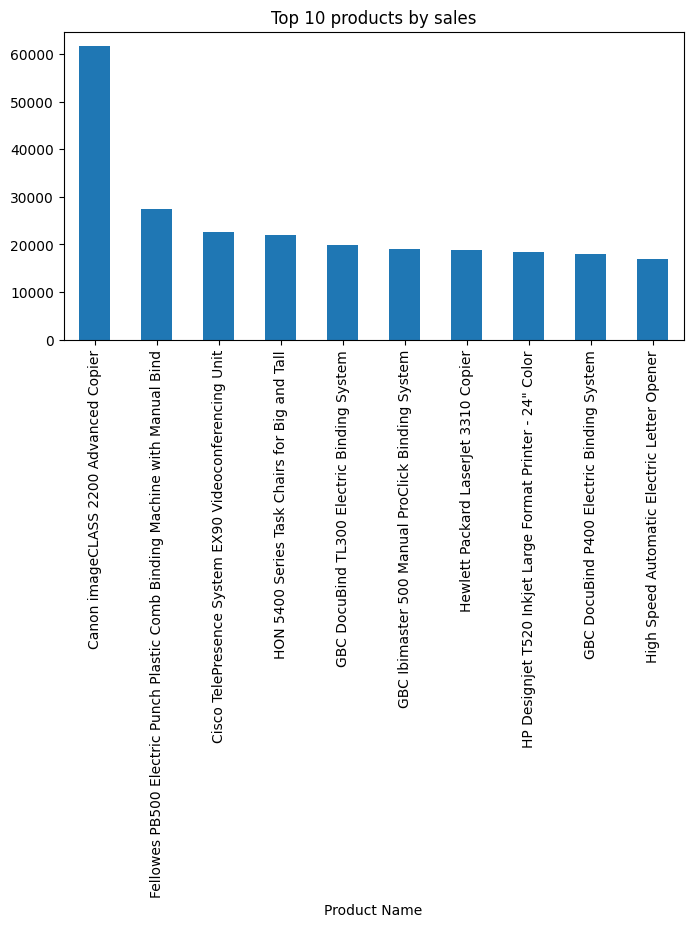

In [11]:
top_products=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar',figsize=(8,4))
plt.title("Top 10 products by sales")
plt.show()

# **Key insights**
* The west region records the highest sales among the other regions
* The highest proft was generated from the technology Category
* The sales show seasonal peaks during the later months of the year
* A small number of products contribute significantly to overall revenue
  

In [12]:
df.to_csv('Cleaned_Superstore_Data.csv',index=False)